In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_iris

In [2]:
irs= load_iris()

In [3]:
dir(irs)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
irs.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
irs.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
irs.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(irs.data,columns=irs.feature_names)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
95,5.7,3.0,4.2,1.2
76,6.8,2.8,4.8,1.4
61,5.9,3.0,4.2,1.5
46,5.1,3.8,1.6,0.2
51,6.4,3.2,4.5,1.5


In [8]:
df["Target"] = irs.target

In [9]:
flower_names = []
for i in irs.target:
    flower_names.append(irs.target_names[i])

df["Flower_name"] = flower_names
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
41,4.5,2.3,1.3,0.3,0,setosa
90,5.5,2.6,4.4,1.2,1,versicolor
93,5.0,2.3,3.3,1.0,1,versicolor
139,6.9,3.1,5.4,2.1,2,virginica
80,5.5,2.4,3.8,1.1,1,versicolor


In [10]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [11]:
from scipy.stats import norm
import numpy as np

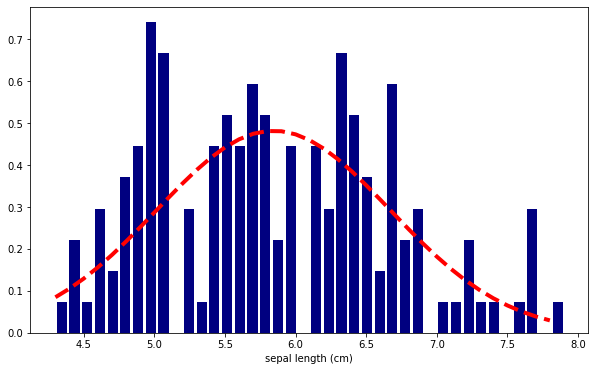

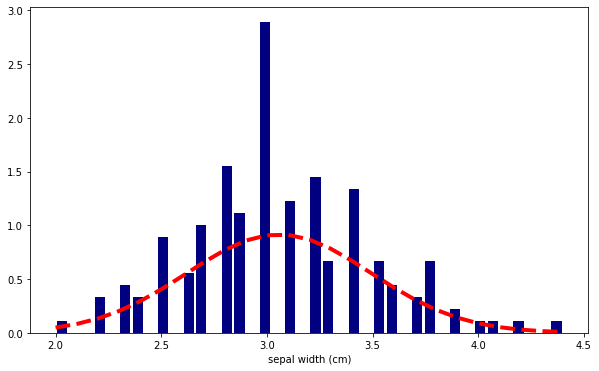

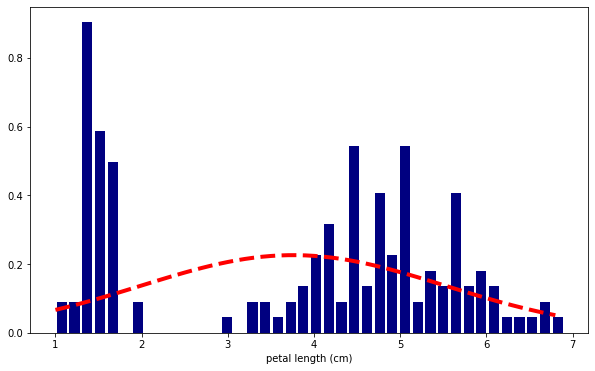

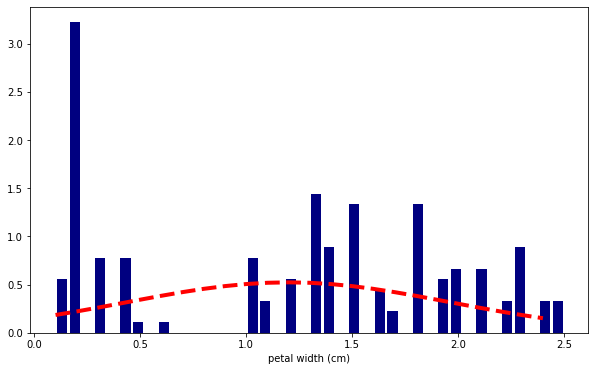

In [12]:
%matplotlib inline
for i in irs.feature_names:
    plt.figure(figsize=(10,6))
    plt.hist(df[i],bins=40,rwidth=0.8,density=True,color='navy')
    plt.xlabel(i)

    rng = np.arange(df[i].min(),df[i].max(),0.1)
    plt.plot(rng,norm.pdf(rng,df[i].mean(),df[i].std()),'r--',linewidth=4)

In [13]:
df_setosa=df[df.Flower_name == "setosa"]
df_versicolor=df[df.Flower_name =="versicolor"]
df_virginica=df[df.Flower_name =="virginica"]

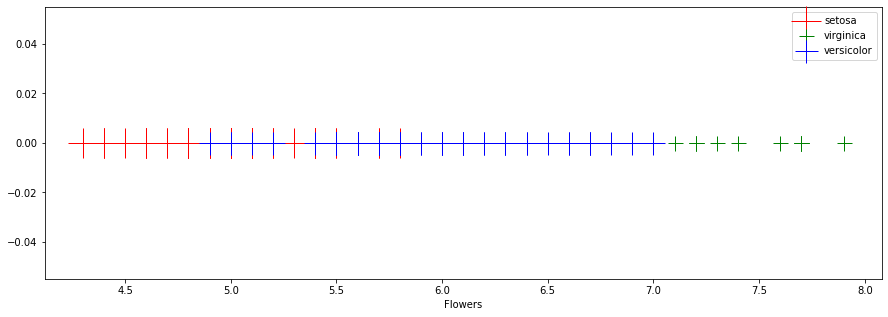

In [14]:
# lets yake petal_length
plt.figure(figsize=(15,5))
plt.plot(df_setosa['sepal length (cm)'],np.zeros_like(df_setosa['sepal length (cm)']),'r+', markersize=30,label="setosa")
plt.plot(df_virginica['sepal length (cm)'],np.zeros_like(df_virginica['sepal length (cm)']),'g+', markersize=15,label='virginica')
plt.plot(df_versicolor['sepal length (cm)'],np.zeros_like(df_versicolor['sepal length (cm)']),'b+', markersize=23,label='versicolor')

plt.xlabel("Flowers")

plt.legend()

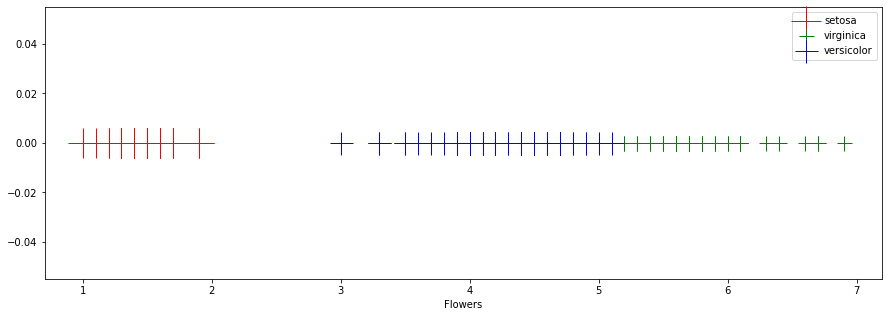

In [15]:
# lets yake petal_length
plt.figure(figsize=(15,5))
plt.plot(df_setosa['petal length (cm)'],np.zeros_like(df_setosa['petal length (cm)']),'r+', markersize=30,label="setosa")
plt.plot(df_virginica['petal length (cm)'],np.zeros_like(df_virginica['petal length (cm)']),'g+', markersize=15,label='virginica')
plt.plot(df_versicolor['petal length (cm)'],np.zeros_like(df_versicolor['petal length (cm)']),'b+', markersize=23,label='versicolor')

plt.xlabel("Flowers")

plt.legend()

# Bivariate Analysis

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


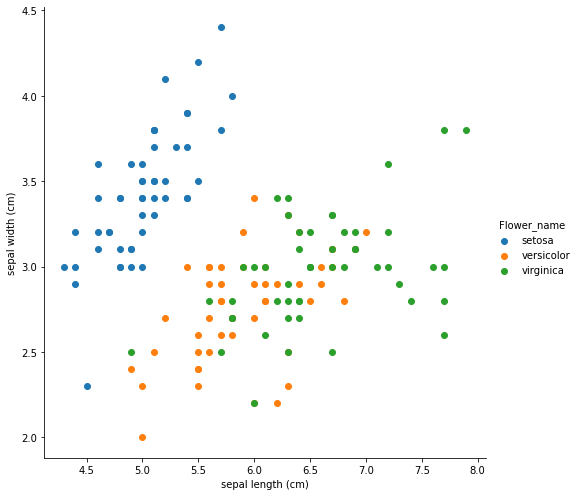

In [16]:
sn.FacetGrid(df,hue='Flower_name',size=7).map(plt.scatter,"sepal length (cm)","sepal width (cm)").add_legend();

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


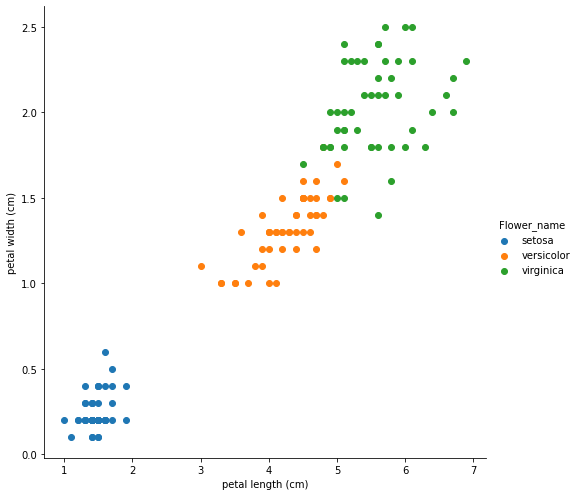

In [17]:
sn.FacetGrid(df,hue='Flower_name',size=7).map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend();

In [18]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target', 'Flower_name'],
      dtype='object')

In [19]:
x=df.drop(["Target","Flower_name"],axis=1)
y=df.Target

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x,y)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x,y)

from sklearn.svm import SVC
sv=SVC()
sv.fit(x,y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [21]:
dt.score(x,y)

1.0

In [22]:
rfc.score(x,y)

1.0

In [23]:
sv.score(x,y)

0.9733333333333334

In [24]:
sv_pred = sv.predict(x)

Text(42.0, 0.5, 'True_Values')

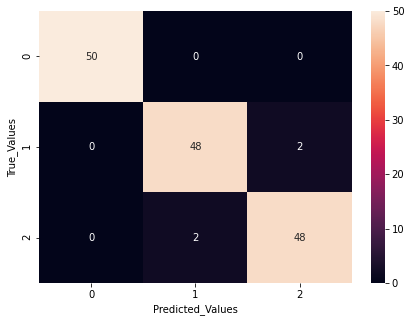

In [25]:
cm = confusion_matrix(y,sv_pred)
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted_Values')
plt.ylabel('True_Values')

In [26]:
print(classification_report(y, sv_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [27]:
knn.score(x,y)

0.96

In [28]:
knn_pred = knn.predict(x)

Text(42.0, 0.5, 'True_Values')

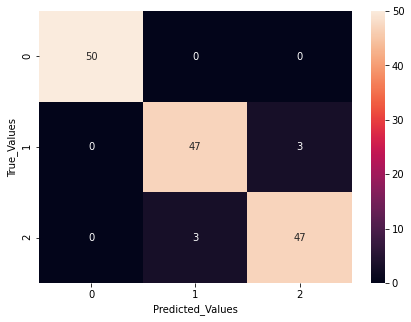

In [29]:
cm = confusion_matrix(y,knn_pred)
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted_Values')
plt.ylabel('True_Values')

In [30]:
print(classification_report(y, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [41]:
import joblib

In [42]:
joblib.dump(dt,'dt_joblib')
joblib.dump(rfc,'rfc_joblib')
joblib.dump(sv,'sv_joblib')
joblib.dump(knn,'knn_joblib')

['knn_joblib']

In [45]:
dt_j = joblib.load('dt_joblib')
rf_j = joblib.load('rfc_joblib')
sv_j = joblib.load('sv_joblib')
knn_j = joblib.load('knn_joblib')

In [46]:
dt_j.predict([[5.7,2.9,4.2,1.3]])

array([1])

In [50]:
rf_j.predict([[5.7,2.9,4.2,1.3]])

array([1])

In [48]:
sv_j.predict([[5.7,2.9,4.2,1.3]])

array([1])

In [49]:
knn_j.predict([[5.7,2.9,4.2,1.3]])

array([1])